In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid   # for grid view
import matplotlib.image as matimage  # for read image using matplotlib
import cv2                           # provide  a real-time optimized Computer Vision library, tools, and hardware

# magic function
%matplotlib inline

In image augmentation the metadata of data should be changed

In [91]:
# for i in range(11):
#     angel = np.random.uniform(30)  - 30/2
#     print(angel)

In [92]:
def brightness(imageNamefilePath):
    imageData = cv2.cvtColor(imageNamefilePath, cv2.COLOR_RGB2HSV)  # convert RGB image to HSV
    Randombright = 0.9*np.random.uniform()                          # create random brightness with bias
    imageData[:, :,2] = imageData[:, :,2]* Randombright             # updating image index value ; imageData[:, :,2] means 3 dimensional array of RGB and changing the colour value of the last index for changing the brightness
    imageData  = cv2.cvtColor(imageData, cv2.COLOR_HSV2RGB)         # convert HSV image to RB for original image color
    return imageData

<h3> HSV </h3> 
An HSV color model is the most accurate color model as long as the way humans perceive colors. How humans perceive colors is not like how RGB or CMYK make colors. They are just primary colors fused to create the spectrum. The H stands for Hue, S stands for Saturation, and the V stand for value. \
Hue: Hue tells the angle to look at the cylindrical disk. The hue represents the color. The hue value ranges from o to 360 degrees.\
Saturation: The saturation value tells us how much quantity of respective color must be added. A 100% saturation means that complete pure color is added, while a 0% saturation means no color is added, resulting in grayscale. \
Value: The value represents the brightness concerning the saturation of the color. the value 0 represents total black darkness, while the value 100 will mean a full brightness and depend on the saturation.

In [93]:
5* 10 * np.random.uniform() - 10/2

30.72854081454971

<h2> Image Transformation </h2>

In [94]:
def imageTransformation(imageNamefilePath, angle_range_change, shear_range_change, translation_range):
    
    
    
    # Image Angel Rotation Calculation
    angle_rotation = np.random.uniform(angle_range_change) - angle_range_change / 2
    image_hieght, image_width, color_ch = imageNamefilePath.shape
    image_metrixCalculation = cv2.getRotationMatrix2D((image_width/2, image_hieght/2), angle_rotation, 1)
    
    
    #Image Translation
    axisX = translation_range* np.random.uniform() - translation_range/2
    axisY = translation_range* np.random.uniform() - translation_range/2
    TranslatationConcatenateMerge = np.float32([[1, 0, axisX], [0, 1, axisY]])
    
    
    #Image Sheare range Calculation
    shear_range_changeValue = np.float32([[5, 5], [20, 5], [5, 20]])                      # shear range attributes ; can be any values
    
    axisPoint1 = 5 + shear_range_change * np.random.uniform() - shear_range_change/2      # 5 + indicates rotation in clockwise ; if 5 - then rotation anti clock wise
    axisPoint2 = 20 + shear_range_change * np.random.uniform() - shear_range_change/2     
          
    Points = np.float32([[axisPoint1, 5], [axisPoint2, axisPoint1], [5, axisPoint2]])     # udating points according to ([[5, 5], [20, 5], [5, 20]])
    
    shearRangeoncatenateMerge  = cv2.getAffineTransform(shear_range_changeValue, Points)  # merge the shear rane values with the updated axis points
    
    
    
    
    image = cv2.warpAffine(imageNamefilePath, image_metrixCalculation, (image_width, image_hieght)) # unpacking
    image = cv2.warpAffine(image, TranslatationConcatenateMerge, (image_width, image_hieght))
    image = cv2.warpAffine(image, shearRangeoncatenateMerge, (image_width, image_hieght))
    
    image = brightness(image)
    
    return image

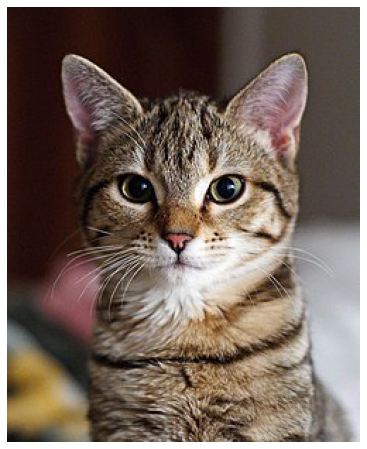

In [95]:
plt.figure(figsize=(10, 8))
imagefilePath = matimage.imread("../input/single-cat-image/cat.jpg") # defining input image file
plt.imshow(imagefilePath)
plt.axis('off')
plt.show()

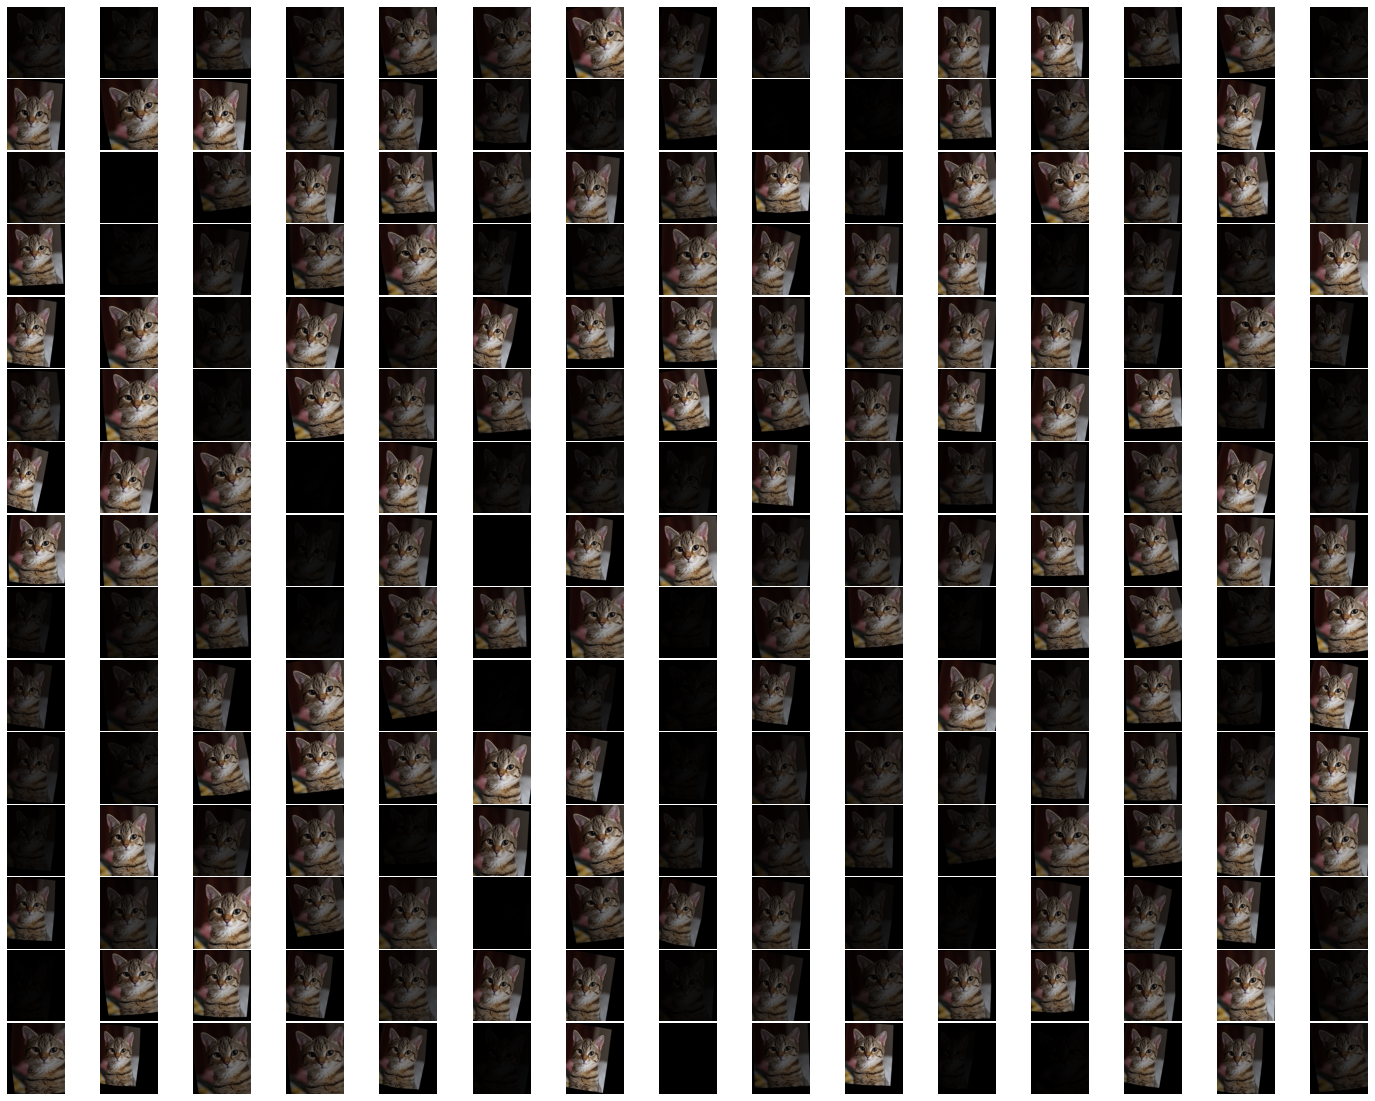

In [100]:
gridValue1 = grid.GridSpec(15, 15)  # no. of rows and columns
gridValue1.update(wspace = 0.01, hspace = 0.02)
plt.figure(figsize=(25,20))

for i in range(225):      # 15 * 15 = 225 total image output
    ax1 = plt.subplot(gridValue1[i]) # subplot = plot multiple values in single image ; subplot vs subplots?
    #ax1.set_xticklabels([])
    #ax1.set_yticklabels([])
    ax1.set_aspect('equal')  # The ration in each pixel is set to equal ; The Axes.set_aspect() function in axes module of matplotlib library is used to set the aspect of the axis scaling, i.e. the ratio of y-unit to x-unit.
    image = imageTransformation(imagefilePath, 20, 5, 2)
    plt.imshow(image)
    plt.axis('off')
    
    matimage.imsave("./"+str(i+1)+".png", image) # saving the transformed image in output 
    
    plt.subplot(15, 15, i+1)   # increment
    
plt.show()    

set_aspect() example

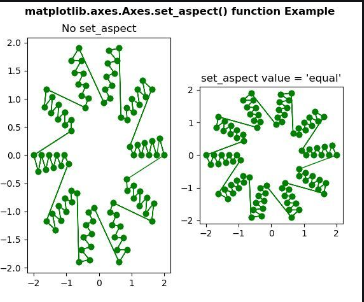